## List ve Dict Comprehensions

#### Aşağıdaki şekilde string değiştiren fonksiyon yazılacak
#### before : "hi my name is john and i am learning python"
#### after : "Hi mY NaMe iS JoHn aNd i aM LeArNiNg pYtHoN"

In [1]:
def alternating(string):
    new_string = ""
    for string_index in range(len(string)):
        if string_index % 2 == 0:
            new_string += string[string_index].upper()
        else:
            new_string += string[string_index].lower()
    print(new_string)
alternating("hi my name is john and i am learning python")


Hi mY NaMe iS JoHn aNd i aM LeArNiNg pYtHoN


#### çift indexte yer alan öğrencileri bir listeye
#### tek indexte yer alanları farklı listeye yazdır

In [2]:
student = ["John", "Mark", "Venessa", "Mariam"]

def divide_students(students):
    groups = [[], []]
    for index, student in enumerate(students):
        if index % 2 == 0:
            groups[0].append(student)
        else:
            groups[1].append(student)
    print(groups)
    return groups
st = divide_students(student)
st[1]       

[['John', 'Venessa'], ['Mark', 'Mariam']]


['Mark', 'Mariam']

#### Çift sayıların karesi alınarak bir sözlüğe eklenmek isteniyor
#### Key'ler orijinal değerler value'lar ise değiştirilmiş değerler olacak.

In [3]:
numbers = range(10)
new_dict = {}

for n in numbers:
    if n % 2 == 0:
        new_dict[n] = n**2
print(new_dict)

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


#### Bir verisetindeki değişken isimlerini değiştirmek

In [4]:
import warnings
import seaborn as sns
df = sns.load_dataset("car_crashes")
df.columns

D:\anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [5]:
A = []
for col in df.columns:
    A.append(col.upper())
A

['TOTAL',
 'SPEEDING',
 'ALCOHOL',
 'NOT_DISTRACTED',
 'NO_PREVIOUS',
 'INS_PREMIUM',
 'INS_LOSSES',
 'ABBREV']

In [6]:
df.columns = A
df.columns
#df.columns = [col.upper() for col in df.columns]

Index(['TOTAL', 'SPEEDING', 'ALCOHOL', 'NOT_DISTRACTED', 'NO_PREVIOUS',
       'INS_PREMIUM', 'INS_LOSSES', 'ABBREV'],
      dtype='object')

#### İsminde "INS" geçenlere "FLAG" geçmeyenlere "NO_FLAG" yazılsın

In [7]:
#[col for col in df.columns if "INS" in col]

#["FLAG_" + col for col in df.columns if "INS" in col]

["FLAG_" + col if "INS" in col else "NO_FLAG_" + col for col in df.columns]

['NO_FLAG_TOTAL',
 'NO_FLAG_SPEEDING',
 'NO_FLAG_ALCOHOL',
 'NO_FLAG_NOT_DISTRACTED',
 'NO_FLAG_NO_PREVIOUS',
 'FLAG_INS_PREMIUM',
 'FLAG_INS_LOSSES',
 'NO_FLAG_ABBREV']

#### key' i string, value'su aşağıdaki gibi bir liste olan sözlük oluşturmak

In [8]:
# Output:
#{"total" : ["mean", "min", "max", "var"]}

In [9]:
df = sns.load_dataset("car_crashes")
df.columns

num_cols = [col for col in df.columns if df[col].dtype != "O"] #numeric değişkenlere uyguladık
soz = {}
agg_list = ["mean", "min", "max", "var"]

for col in num_cols:
    soz[col] = agg_list
soz

{'total': ['mean', 'min', 'max', 'var'],
 'speeding': ['mean', 'min', 'max', 'var'],
 'alcohol': ['mean', 'min', 'max', 'var'],
 'not_distracted': ['mean', 'min', 'max', 'var'],
 'no_previous': ['mean', 'min', 'max', 'var'],
 'ins_premium': ['mean', 'min', 'max', 'var'],
 'ins_losses': ['mean', 'min', 'max', 'var']}

In [10]:
# kısa yolu

new_dict = {col: agg_list for col in num_cols}
new_dict

{'total': ['mean', 'min', 'max', 'var'],
 'speeding': ['mean', 'min', 'max', 'var'],
 'alcohol': ['mean', 'min', 'max', 'var'],
 'not_distracted': ['mean', 'min', 'max', 'var'],
 'no_previous': ['mean', 'min', 'max', 'var'],
 'ins_premium': ['mean', 'min', 'max', 'var'],
 'ins_losses': ['mean', 'min', 'max', 'var']}

In [11]:
df[num_cols].head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [12]:
df[num_cols].agg(new_dict)
#agg fonksiyonuna gönderilen sözlükteki değişkenler df' te varsa,
#value bölümündekileri değişkenlere uygular.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000
var,16.990902,4.071303,2.989901,20.330874,14.172755,31789.565170,616.823046


## NumPy

In [13]:
import numpy as np
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

In [14]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
np.random.randint(0, 10, size = 10) #rastgele 10 tane(size)

array([3, 5, 4, 5, 4, 4, 0, 5, 4, 6])

In [16]:
np.random.normal(10, 4, (3,4)) #ort 10, std 4 olan 3 satır 4 sütun

array([[ 4.63148373, 10.17894428,  4.16537991, 12.99454631],
       [11.31009852,  9.30734894, 18.18792715,  0.0930653 ],
       [11.35357815, 12.75086855, 20.51148238,  7.3427056 ]])

In [17]:
a = np.random.randint(10, size = 5) #0 dan 10 a kadar

In [18]:
a.ndim

1

In [19]:
a.shape

(5,)

In [20]:
a.size

5

In [21]:
a.dtype

dtype('int32')

In [22]:
b = np.random.randint(1, 10, size = 9)

In [23]:
b.reshape(3, 3) #10 elemanlı olsaydı hata verecekti

array([[2, 7, 1],
       [4, 9, 9],
       [5, 7, 4]])

In [24]:
c = np.random.randint(10, size = 10)
c

array([5, 5, 9, 3, 3, 0, 4, 4, 4, 6])

In [25]:
c[0]

5

In [26]:
c[0:5]

array([5, 5, 9, 3, 3])

In [27]:
c[0] = 999
c

array([999,   5,   9,   3,   3,   0,   4,   4,   4,   6])

In [28]:
d = np.random.randint(10, size = (3, 5))
d

array([[6, 7, 3, 2, 2],
       [4, 9, 3, 7, 6],
       [1, 9, 9, 1, 3]])

In [29]:
d[2, 2]

9

In [30]:
d[2, 2] = 99
d[2, 2]

99

In [31]:
d[1, 1] = 2.9 
d[1, 1]

2

In [32]:
d[:, 0]

array([6, 4, 1])

In [33]:
d[1,:]

array([4, 2, 3, 7, 6])

In [34]:
d[0:2, 0:3]

array([[6, 7, 3],
       [4, 2, 3]])

In [35]:
v = np.arange(0, 30, 3)
v

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [36]:
catch = [1,2,3]
v[catch]

array([3, 6, 9])

#### Array' in içinden liste oluşturmak

In [37]:
v1 = np.array([1,2,3,4,5])

In [38]:
ab = []
for i in v1:
    if i < 3:
        ab.append(i)
print(ab)

[1, 2]


In [39]:
v1[v1 < 3]

array([1, 2])

In [40]:
v1[v1 != 3]

array([1, 2, 4, 5])

In [41]:
v1 / 5

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [42]:
np.min(v1)

1

In [43]:
np.mean(v1)

3.0

In [44]:
np.var(v1)

2.0

In [45]:
arr = np.array([1,2,3,4,5,6,7])
print(arr[-3:-1]) # -3. elemendan -1. elemana KADAR

[5 6]


## Pandas

In [46]:
import pandas as pd
import warnings

In [47]:
s = pd.Series([10, 13, 35, 45, 46])
s

0    10
1    13
2    35
3    45
4    46
dtype: int64

In [48]:
type(s)

pandas.core.series.Series

In [49]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [50]:
s.dtype #içindeki verinin tip bilgisi

dtype('int64')

In [51]:
s.size

5

In [52]:
s.ndim

1

In [78]:
s.values #values np arrayi döndürdü

array([10, 13, 35, 45, 46], dtype=int64)

In [54]:
type(s.values)

numpy.ndarray

In [64]:
df = pd.read_csv("Advertising.csv")
df.head()
#read_excel
#read_sql
#read_table
#read_sas
#read_json

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [65]:
import seaborn as sns

In [112]:
df = sns.load_dataset("titanic")

In [113]:
df.head() # survived bağımlı değişken

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [115]:
df.shape

(891, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [117]:
#object ve category tipleri kategorik değişkendir

In [118]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [119]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [121]:
df.isnull().values.any()

True

In [122]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [123]:
df["sex"].value_counts() #kategorik değişkende kaçar tane sınıf var

male      577
female    314
Name: sex, dtype: int64

In [124]:
df[0:13]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [125]:
df.drop(0,axis=0).head() #axis=0 satırlardan, axis=1 sütunlardan siler.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [126]:
delete_indexes = [1,3,5,7]

In [127]:
df.drop(delete_indexes, axis=0).head(10)
#değişikliği kalıcı yapmak için df'i yeniden atarız >> df = df....
#veya parantez içine ,inplace = True yapılır

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False


In [128]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

#### Bir değişkeni index yapmak

In [129]:
df.index = df["age"] #age değişkeni index oldu

In [130]:
df.index

Float64Index([22.0, 38.0, 26.0, 35.0, 35.0,  nan, 54.0,  2.0, 27.0, 14.0,
              ...
              33.0, 22.0, 28.0, 25.0, 39.0, 27.0, 19.0,  nan, 26.0, 32.0],
             dtype='float64', name='age', length=891)

In [131]:
#df.drop("age", axis=1, inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age,,,,,,,,,,,,,,,
22.0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
38.0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
26.0,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
35.0,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
35.0,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27.0,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
19.0,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
NaN,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


#### Bir indexi değişken yapmak

In [132]:
df["age"] = df.index
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age,,,,,,,,,,,,,,,
22.0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
38.0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
26.0,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
35.0,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
35.0,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [133]:
df.drop("age", axis=1, inplace = True)

In [134]:
# 2. YOL Bir indexi değişken yapmak
df = df.reset_index() #indexi silip sütuna atıyor
df.head()

,age,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,22.0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,38.0,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,26.0,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,35.0,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,35.0,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Değişkenler üzerinde işlemler

In [135]:
pd.set_option("display.max_columns", None)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [136]:
"age" in df

True

In [137]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [139]:
type(df["age"].head()) #fonksiyona koyarken dikkat bu pandas serisi
                       #dataframe olarak kalması için "[[]]" böyle seçilmeli


pandas.core.series.Series

In [141]:
df[["age"]].head()
type(df[["age"]].head()) #DATAFRAME tipinde

pandas.core.frame.DataFrame

In [142]:
df[["age", "alive"]]

,age,alive
0,22.0,no
1,38.0,yes
2,26.0,yes
3,35.0,yes
4,35.0,no
...,...,...
886,27.0,no
887,19.0,yes
888,NaN,no
889,26.0,yes


In [143]:
col_names = ["age", "embarked", "alive"]

In [154]:
df[col_names] #listeyi dataframe' e atayıp değişken seçildi, drop ile de kullanılabilir

,age,embarked,alive
0,22.0,S,no
1,38.0,C,yes
2,26.0,S,yes
3,35.0,S,yes
4,35.0,S,no
...,...,...,...
886,27.0,S,no
887,19.0,S,yes
888,NaN,S,no
889,26.0,C,yes


In [146]:
df["age2"] = df["age"]**2 # var olan age değişkeninin karesi alınarak yeni değişken oldu

In [147]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,484.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1444.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,676.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1225.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,729.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,361.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,676.0


In [149]:
df["age3"] = df["age"] / df["age2"]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,age3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,484.0,0.045455
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1444.0,0.026316
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,676.0,0.038462
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1225.0,0.028571
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1225.0,0.028571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,729.0,0.037037
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,361.0,0.052632
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,676.0,0.038462


In [ ]:
df.drop(["age3","age2"], axis=1, inplace = True).head()

In [155]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### loc(indexlerdeki labellara göre) ve iloc(index bilgisi vererek seçim)

In [158]:
df.loc[:, ~df.columns.str.contains("age")].head()
#loc df'lerde seçme için kullanılır, contains("age") ile str de seçim yaptık

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [164]:
df.iloc[0:3] #0'dan 3' e kadar

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [162]:
df.iloc[0,0]

0

In [165]:
df.loc[0:3] # 0'dan 3 dahil seçer

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [169]:
df.iloc[0:3, 0:3] #satır ve sütunlardan 3'e kadar seç

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female


In [168]:
df.loc[0:3, "age"]

0    22.0
1    38.0
2    26.0
3    35.0
Name: age, dtype: float64

In [170]:
col_names = ["age", "embarked", "alive"]

In [171]:
df.loc[0:3, col_names]

,age,embarked,alive
0,22.0,S,no
1,38.0,C,yes
2,26.0,S,yes
3,35.0,S,yes


#### Koşullu seçim

In [172]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [176]:
df[df["age"] >  50].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [178]:
df[df["age"] >  50]["age"].count()

64

In [181]:
#değişken ismi girilecek >> loc
df.loc[df["age"] > 50, ["age", "class"]].head()

,age,class
6,54.0,First
11,58.0,First
15,55.0,Second
33,66.0,Second
54,65.0,First


In [186]:
df.loc[(df["age"] > 50) & (df["sex"] == "male"), ["age", "class"]].head()
#birden fazla koşul için koşulllar parantez içine alınmalı

,age,class
6,54.0,First
33,66.0,Second
54,65.0,First
94,59.0,Third
96,71.0,First


In [187]:
df.loc[(df["age"] > 50) & (df["sex"] == "male") & (df["embark_town"] == "Cherbourg"), ["age", "class"]].head()

,age,class
54,65.0,First
96,71.0,First
155,51.0,First
174,56.0,First
487,58.0,First


In [197]:
df_new = df.loc[(df["age"] > 50) 
       & (df["sex"] == "male") 
       & ((df["embark_town"] == "Cherbourg") | (df["embark_town"] == "Southampton")), 
       ["age", "class","embark_town"]]
df_new

,age,class,embark_town
6,54.0,First,Southampton
33,66.0,Second,Southampton
54,65.0,First,Cherbourg
94,59.0,Third,Southampton
96,71.0,First,Cherbourg
124,54.0,First,Southampton
150,51.0,Second,Southampton
152,55.5,Third,Southampton
155,51.0,First,Cherbourg
170,61.0,First,Southampton


In [198]:
df_new["embark_town"].value_counts()

Southampton    35
Cherbourg       9
Name: embark_town, dtype: int64

#### Agg ve Group

In [212]:
#count, first, last, mean, median, min, max, std,
#var, sum, pivot table

In [200]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [201]:
df.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [203]:
df.groupby("sex").agg({"age" : "mean"})

,age
sex,
female,27.915709
male,30.726645


In [204]:
df.groupby("sex").agg({"age" : ["sum","mean"]})

age           
             sum       mean
sex                        
female   7286.00  27.915709
male    13919.17  30.726645

In [207]:
df.groupby("sex").agg({"age" : ["sum","mean"],
                      "survived" : "mean"})

age             survived
             sum       mean      mean
sex                                  
female   7286.00  27.915709  0.742038
male    13919.17  30.726645  0.188908

In [208]:
df.groupby(["sex", "embark_town"]).agg({"age" : ["sum","mean"],
                      "survived" : "mean"})

age             survived
                         sum       mean      mean
sex    embark_town                               
female Cherbourg     1729.00  28.344262  0.876712
       Queenstown     291.50  24.291667  0.750000
       Southampton   5165.50  27.771505  0.689655
male   Cherbourg     2276.92  32.998841  0.305263
       Queenstown     495.00  30.937500  0.073171
       Southampton  11147.25  30.291440  0.174603

In [210]:
df.groupby(["sex", "embark_town", "class"]).agg({"age" : ["sum","mean"],
                      "survived" : "mean"}) #cinsiyetlerin frekans bilgileri gerekli

age             survived
                               sum       mean      mean
sex    embark_town class                               
female Cherbourg   First   1370.00  36.052632  0.976744
                   Second   134.00  19.142857  1.000000
                   Third    225.00  14.062500  0.652174
       Queenstown  First     33.00  33.000000  1.000000
                   Second    30.00  30.000000  1.000000
                   Third    228.50  22.850000  0.727273
       Southampton First   1439.00  32.704545  0.958333
                   Second  1961.50  29.719697  0.910448
                   Third   1765.00  23.223684  0.375000
male   Cherbourg   First   1444.00  40.111111  0.404762
                   Second   207.50  25.937500  0.200000
                   Third    625.42  25.016800  0.232558
       Queenstown  First     44.00  44.000000  0.000000
                   Second    57.00  57.000000  0.000000
                   Third    394.00  28.142857  0.076923
       Southampton First   2681.42  41.897188  0.354430
                   Second  2778.83  30.875889  0.154639
                   Third   5687.00  26.574766  0.128302

In [211]:
df.groupby(["sex", "embark_town", "class"]).agg({"age" : ["sum","mean"],
                      "survived" : "mean",
                       "sex" : "count"})

age             survived   sex
                               sum       mean      mean count
sex    embark_town class                                     
female Cherbourg   First   1370.00  36.052632  0.976744    43
                   Second   134.00  19.142857  1.000000     7
                   Third    225.00  14.062500  0.652174    23
       Queenstown  First     33.00  33.000000  1.000000     1
                   Second    30.00  30.000000  1.000000     2
                   Third    228.50  22.850000  0.727273    33
       Southampton First   1439.00  32.704545  0.958333    48
                   Second  1961.50  29.719697  0.910448    67
                   Third   1765.00  23.223684  0.375000    88
male   Cherbourg   First   1444.00  40.111111  0.404762    42
                   Second   207.50  25.937500  0.200000    10
                   Third    625.42  25.016800  0.232558    43
       Queenstown  First     44.00  44.000000  0.000000     1
                   Second    57.00  57.000000  0.000000     1
                   Third    394.00  28.142857  0.076923    39
       Southampton First   2681.42  41.897188  0.354430    79
                   Second  2778.83  30.875889  0.154639    97
                   Third   5687.00  26.574766  0.128302   265

In [213]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [215]:
df.pivot_table("survived", "sex", "embarked") #kesişimlerde survived ortalaması
                                              #pivot_table default meandir

embarked,C,Q,S
sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


In [216]:
df.pivot_table("survived", "sex", "embarked", aggfunc="std")

embarked,C,Q,S
sex,,,
female,0.331042,0.439155,0.463778
male,0.462962,0.263652,0.380058


In [217]:
df.pivot_table("survived", "sex", ["embarked","class"])

embarked         C                      Q                          S  \
class        First Second     Third First Second     Third     First   
sex                                                                    
female    0.976744    1.0  0.652174   1.0    1.0  0.727273  0.958333   
male      0.404762    0.2  0.232558   0.0    0.0  0.076923  0.354430   

embarked                      
class       Second     Third  
sex                           
female    0.910448  0.375000  
male      0.154639  0.128302

In [219]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [221]:
df["new_age"] = pd.cut(df["age"], [0,10,18,25,40,90])
df.head()
#"cut" sayısal >> kategorik, tanımlayamazsak "qcut"

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(18, 25]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(25, 40]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(25, 40]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 40]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(25, 40]"


In [222]:
df.pivot_table("survived", "sex", "new_age")

new_age,"(0, 10]","(10, 18]","(18, 25]","(25, 40]","(40, 90]"
sex,,,,,
female,0.612903,0.729730,0.759259,0.802198,0.770833
male,0.575758,0.131579,0.120370,0.220930,0.176471


In [223]:
df.pivot_table("survived", "sex", ["new_age", "class"])

new_age (0, 10]                   (10, 18]                   (18, 25]  \
class     First Second     Third     First Second     Third     First   
sex                                                                     
female      0.0    1.0  0.500000  1.000000    1.0  0.523810  0.941176   
male        1.0    1.0  0.363636  0.666667    0.0  0.103448  0.333333   

new_age                      (25, 40]                      (40, 90]            \
class      Second     Third     First    Second     Third     First    Second   
sex                                                                             
female   0.933333  0.500000  1.000000  0.906250  0.464286  0.961538  0.846154   
male     0.047619  0.115385  0.513514  0.071429  0.172043  0.280000  0.095238   

new_age            
class       Third  
sex                
female   0.111111  
male     0.064516

#### Apply Lambda

In [224]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [225]:
df["age2"] = df["age"]*2
df["age3"] = df["age"]*5

In [227]:
(df["age"]/10).head()
(df["age2"]/10).head()
(df["age3"]/10).head()

0    11.0
1    19.0
2    13.0
3    17.5
4    17.5
Name: age3, dtype: float64

In [228]:
for col in df.columns:
    if "age" in col:
        print(col)

age
age2
age3


In [229]:
for col in df.columns:
    if "age" in col:
        print((df[col]/10).head())

0    2.2
1    3.8
2    2.6
3    3.5
4    3.5
Name: age, dtype: float64
0    4.4
1    7.6
2    5.2
3    7.0
4    7.0
Name: age2, dtype: float64
0    11.0
1    19.0
2    13.0
3    17.5
4    17.5
Name: age3, dtype: float64


In [230]:
for col in df.columns:
    if "age" in col:
        df[col] = df[col]/10
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,age3
0,0,3,male,2.2,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4.4,11.0
1,1,1,female,3.8,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,7.6,19.0
2,1,3,female,2.6,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,5.2,13.0
3,1,1,female,3.5,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,7.0,17.5
4,0,3,male,3.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,7.0,17.5


In [231]:
df[["age", "age2", "age3"]].apply(lambda x: x/10).head()

,age,age2,age3
0,0.22,0.44,1.10
1,0.38,0.76,1.90
2,0.26,0.52,1.30
3,0.35,0.70,1.75
4,0.35,0.70,1.75


In [232]:
df.loc[:, df.columns.str.contains("age")].apply(lambda x: x/10).head()

,age,age2,age3
0,0.22,0.44,1.10
1,0.38,0.76,1.90
2,0.26,0.52,1.30
3,0.35,0.70,1.75
4,0.35,0.70,1.75


In [233]:
df.loc[:, df.columns.str.contains("age")].apply(lambda x: (x - x.mean()) / x.std()).head()

,age,age2,age3
0,-0.530005,-0.530005,-0.530005
1,0.571430,0.571430,0.571430
2,-0.254646,-0.254646,-0.254646
3,0.364911,0.364911,0.364911
4,0.364911,0.364911,0.364911


In [234]:
def standart_scaler(col_name):
    return (col_name - col_name.mean()) / col_name.std()
df.loc[:, df.columns.str.contains("age")].apply(standart_scaler).head()

,age,age2,age3
0,-0.530005,-0.530005,-0.530005
1,0.571430,0.571430,0.571430
2,-0.254646,-0.254646,-0.254646
3,0.364911,0.364911,0.364911
4,0.364911,0.364911,0.364911


In [235]:
df.loc[:, df.columns.str.contains("age")] = df.loc[:, df.columns.str.contains("age")].apply(standart_scaler).head()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,age3
0,0,3,male,-0.530005,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530005,-0.530005
1,1,1,female,0.571430,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571430,0.571430
2,1,3,female,-0.254646,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254646,-0.254646
3,1,1,female,0.364911,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.364911,0.364911
4,0,3,male,0.364911,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.364911,0.364911


#### join

In [2]:
import numpy as np
import pandas as pd
m = np.random.randint(1, 30, size=(5,3))
df1 = pd.DataFrame(m, columns = ["var1", "var2", "var3"])
df2 = df1 + 99
pd.concat([df1, df2], ignore_index = True) #indexleri düzeltti

D:\anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,var1,var2,var3
0,26,28,3
1,15,17,17
2,16,1,17
3,26,21,16
4,11,13,19
5,125,127,102
6,114,116,116
7,115,100,116
8,125,120,115
9,110,112,118


In [4]:
m

array([[26, 28,  3],
       [15, 17, 17],
       [16,  1, 17],
       [26, 21, 16],
       [11, 13, 19]])

In [5]:
# pd.merge(df1, df2)

In [7]:
import pandas as pd
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df11 = pd.DataFrame(data)
subset = df11.loc[0:1, ['A', 'B']]
subset

,A,B
0,1,4
1,2,5


### Data Visualization

In [8]:
#kategorik değişken : sütun grafiği : countplot, bar
#sayısal değişken : histogram, boxplot

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
df.head()

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


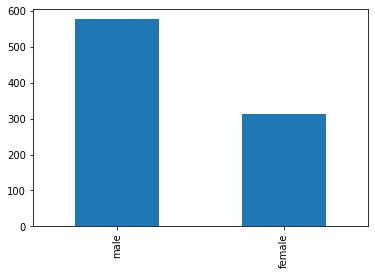

In [10]:
df["sex"].value_counts().plot(kind="bar")
plt.show()

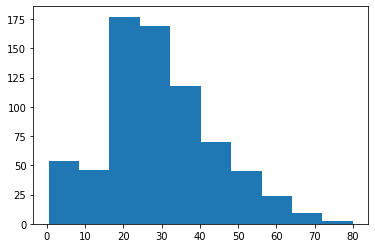

In [11]:
plt.hist(df["age"])
plt.show()

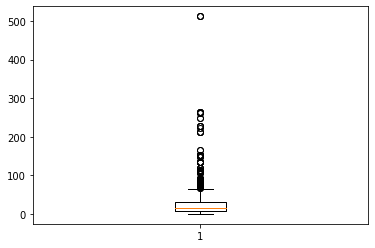

In [13]:
plt.boxplot(df["fare"]) #aykırı değerleri çeyreklikler üzerinden yakalayabilir.
plt.show()

In [14]:
#matplotlib özellikleri

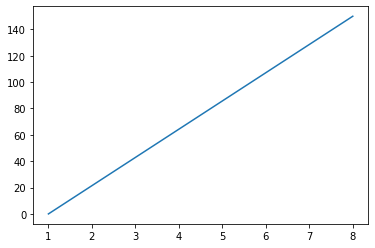

In [19]:
x = np.array([1, 8])
y = np.array([0, 150])
plt.plot(x,y)
#plt.plot(x,y, "o")
plt.show()

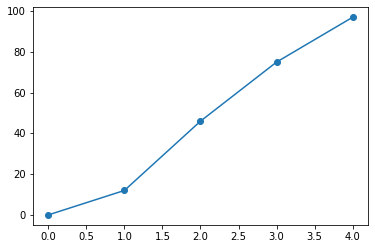

In [21]:
y1 = np.array([0, 12, 46, 75, 97])
plt.plot(y1, marker="o")
plt.show()

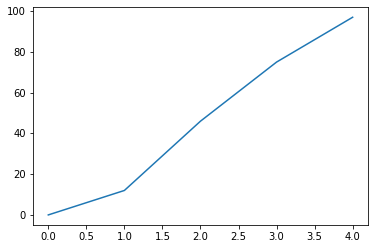

In [24]:
y1 = np.array([0, 12, 46, 75, 97])
plt.plot(y1)
#plt.plot(y1, linestyle="dotted", color="r"), "dotted"
plt.show()

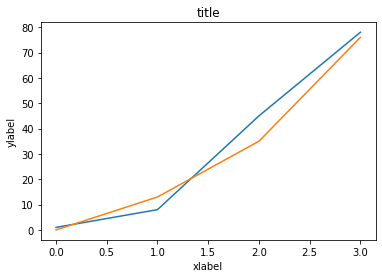

In [28]:
x = np.array([1, 8, 45, 78])
y = np.array([0, 13, 35, 76])
plt.plot(x)
plt.plot(y)
plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.show()

In [34]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


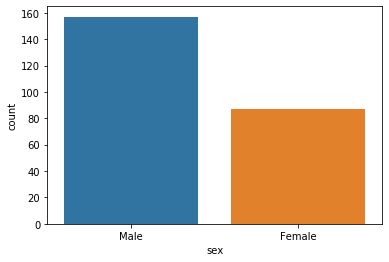

In [35]:
sns.countplot(x=df["sex"], data=df)
plt.show()

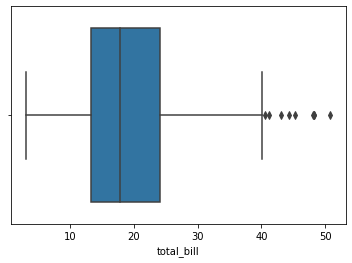

In [36]:
sns.boxplot(x=df["total_bill"])
plt.show()

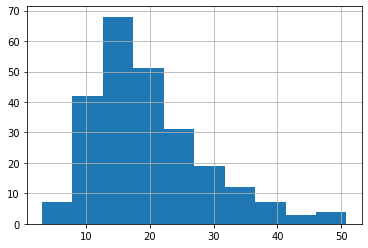

In [37]:
df["total_bill"].hist()
plt.show()

### EDA

In [38]:
#Analysis of Categorical Variables
#Analysis of Numerical Variables
#Analysis of Target Variables
#Analysis of Correlation

In [84]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
#df.tail()
#df.shape()
#df.info()
#df.columns()
#df.index()
#df.describe()
#df.isnull().values.any()
#df.isnull().sum()

In [86]:
def check_df(dataframe, head=5):
    print("##### Shape #####")
    print(dataframe.shape)
    print("##### Types #####")
    print(dataframe.dtypes)
    print("##### NA #####")
    print(dataframe.isnull().sum())
check_df(df)

##### Shape #####
(891, 15)
##### Types #####
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##### NA #####
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [87]:
df1 = sns.load_dataset("tips")

In [88]:
check_df(df1)

##### Shape #####
(244, 7)
##### Types #####
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
##### NA #####
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


#### kategorik değişken analizi

In [89]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [90]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [91]:
df["sex"].nunique()

2

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [93]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

#numerik gorunumlu kategorikler
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
num_but_cat

cat_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_cardinal

cat_but_cardinal = cat_but_cardinal + num_but_cat
cat_but_cardinal

cat_cols = [col for col in df.columns if col not in cat_but_cardinal]cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [97]:
#numerik gorunumlu kategorikler
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
num_but_cat

[]

In [95]:
cat_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_cardinal

[]

In [96]:
cat_but_cardinal = cat_but_cardinal + num_but_cat
cat_but_cardinal

[]

In [74]:
cat_cols = [col for col in df.columns if col not in cat_but_cardinal]

In [75]:
df[cat_cols].nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [83]:
[col for col in df.columns if col not in cat_cols]

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [99]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")
cat_summary(df, "sex")
#    df["survived"].value_counts()
#    100 * df["survived"].value_counts() / len(df)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


In [100]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
#########################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################
     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################
     

#### kategorik değişken analizi 2

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


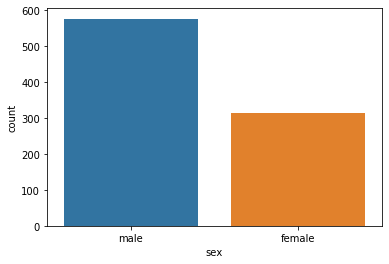

In [101]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


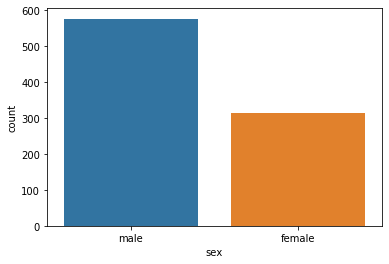

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


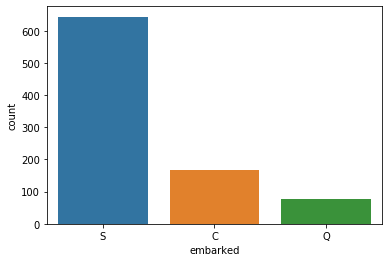

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


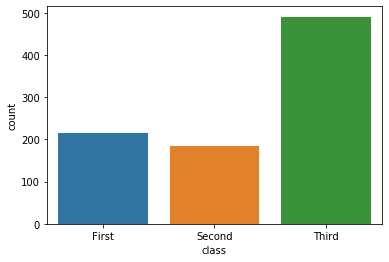

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


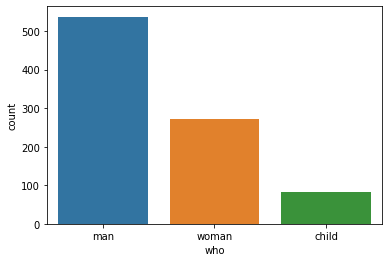

asdasdasdasdasd
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


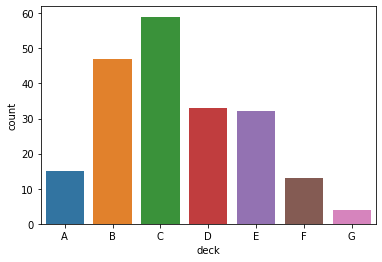

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


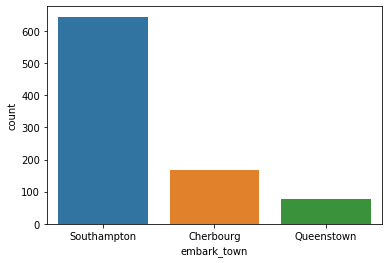

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


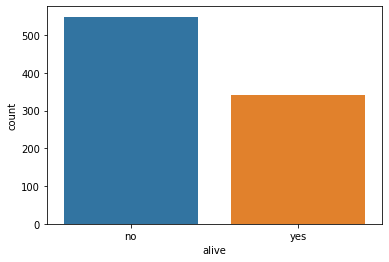

asdasdasdasdasd


In [104]:
for col in cat_cols:
    if df[col].dtypes == "bool": #bool type'ları atladı
        print("asdasdasdasdasd")
    else:
        cat_summary(df, col, plot=True)    

In [105]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


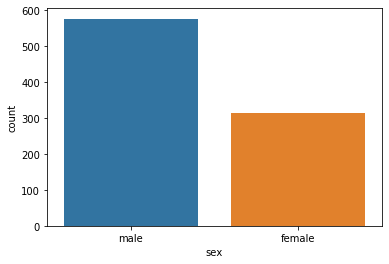

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


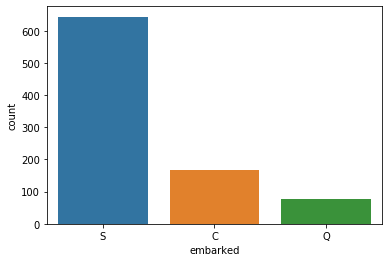

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


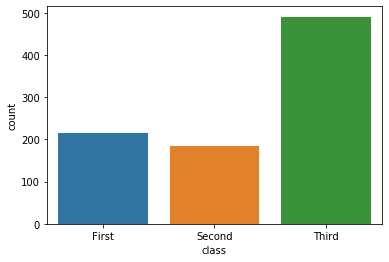

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


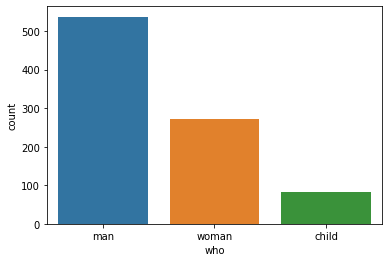

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
#########################


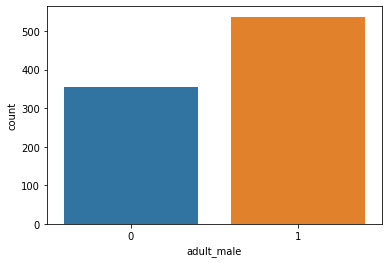

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


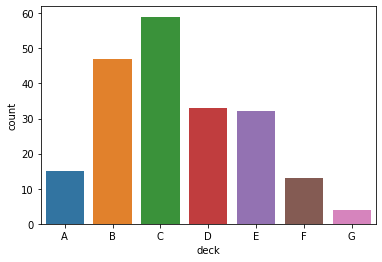

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


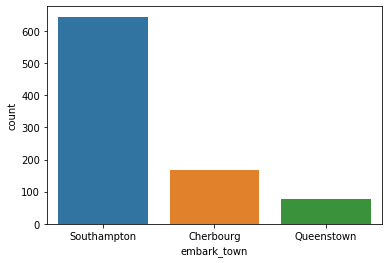

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


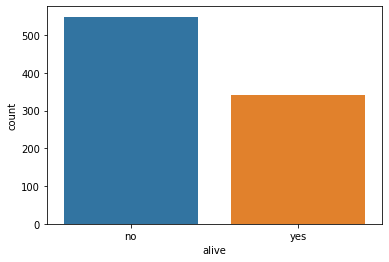

   alone     Ratio
1    537  60.26936
0    354  39.73064
#########################


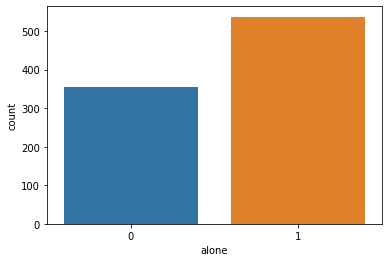

In [109]:
for col in cat_cols:
    if df[col].dtypes == "bool": 
        df[col] = df[col].astype(int) 
    else:
        cat_summary(df, col, plot=True)    

#### sayısal değişken analizi 

In [2]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

D:\anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df[["age", "fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols
#numerik gorunumlu kategorikler

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [18]:
#numerik gorunumlu kategorikler
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
num_but_cat

[]

In [19]:
cat_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_cardinal

[]

In [20]:
cat_but_cardinal = cat_but_cardinal + num_but_cat
cat_but_cardinal

[]

In [21]:
cat_cols = [col for col in df.columns if col not in cat_but_cardinal]

In [16]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]

In [15]:
#survived, plcass, sibsp, parch kategorik değişkendir

In [22]:
num_cols = [col for col in num_cols if col not in cat_cols]

In [23]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
num_summary(df, "age")
    

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


In [26]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


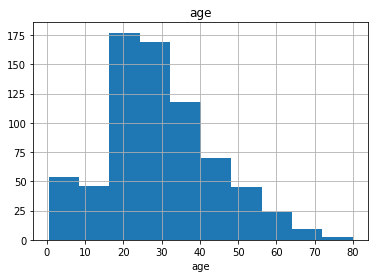

In [30]:
import matplotlib.pyplot as plt
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
num_summary(df, "age", plot=True)    

In [34]:
for col in num_cols:
    num_summary(df, col, plot=True)

### Capturing Variables and Generalizing Operations

In [37]:
import numpy as np
import pandas as pd
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
#kategorik degisken liste,numerik degisken liste, kategorik ama cardinal liste

In [41]:
 #eşsiz değer sayısı 10'dan küçükse kategorik; kategorik değişken eşsiz değer sayısı 20' den büyükse kardinal

In [44]:
#docstring

In [48]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    """
    Veri setindeki kategorik degisken liste,numerik degisken liste, kategorik ama cardinal listelerini verir.
    
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri
    
    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi
    
    Notes
    -------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat, cat_cols'un içerisindedir. 
    
    """
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float"]]
    cat_but_car = [col for col in df.columns if 
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


In [53]:
cat_cols
#num_cols
#cat_but_car

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [54]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")

cat_summary(df, "sex")

for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################
        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
#########################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################
  

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


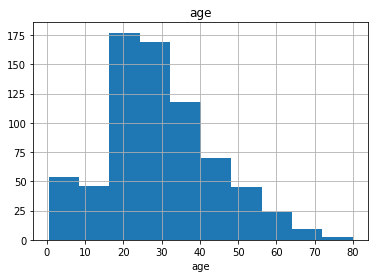

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


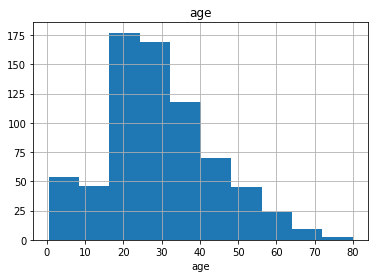

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


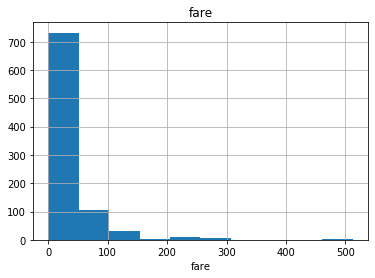

In [55]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
num_summary(df, "age", plot=True)   

for col in num_cols:
    num_summary(df, col, plot=True)

In [57]:
df = sns.load_dataset("titanic")
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int32   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int32   
dtypes: category(2), float64(2), int32(2), int64(4), object(5)
memory usage: 85.9+ KB


In [59]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 11
num_cols: 2
cat_but_car: 0
num_but_cat: 4


        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


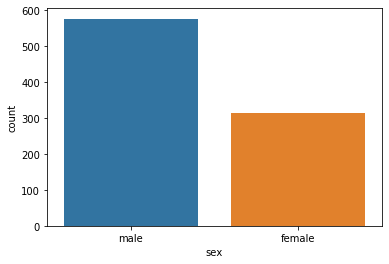

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


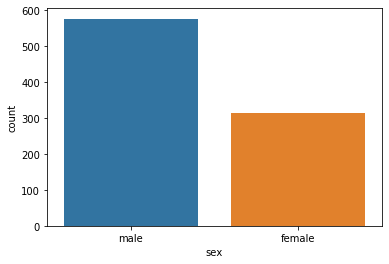

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


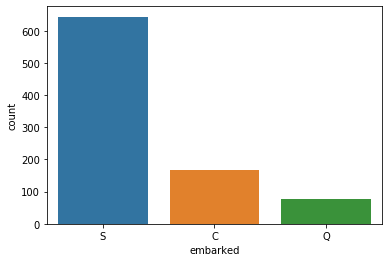

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


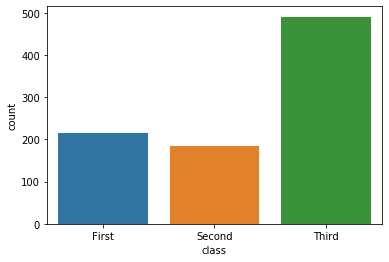

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


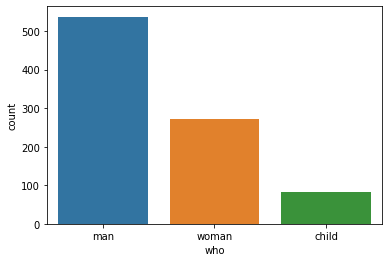

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


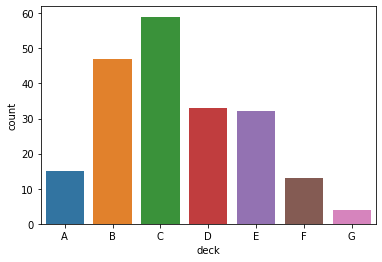

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


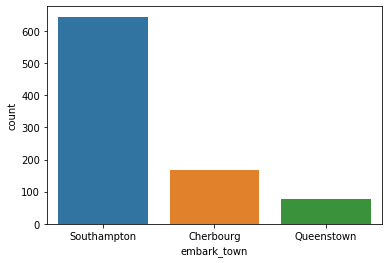

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


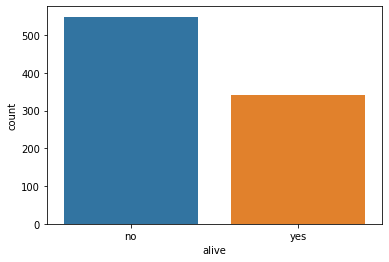

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################


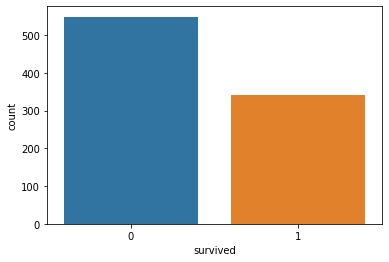

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################


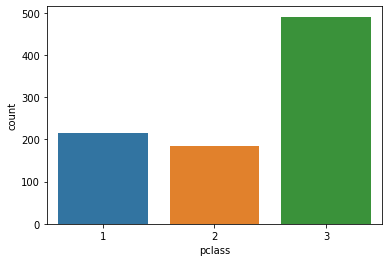

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################


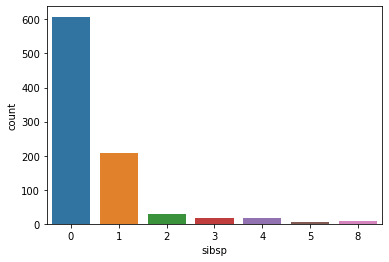

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################


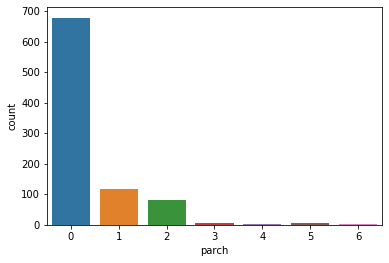

In [60]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
cat_summary(df, "sex", plot=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)
    

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

### Analysis of Target Variable

In [66]:
df = sns.load_dataset("titanic")
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

In [71]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    """
    Veri setindeki kategorik degisken liste,numerik degisken liste, kategorik ama cardinal listelerini verir.
    
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri
    
    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi
    
    Notes
    -------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat, cat_cols'un içerisindedir. 
    
    """
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float"]]
    cat_but_car = [col for col in df.columns if 
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [72]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 11
num_cols: 2
cat_but_car: 0
num_but_cat: 4


        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


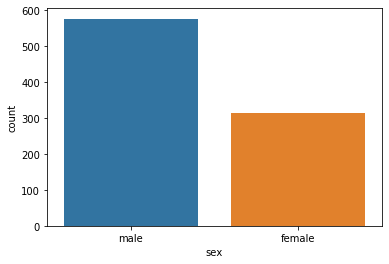

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


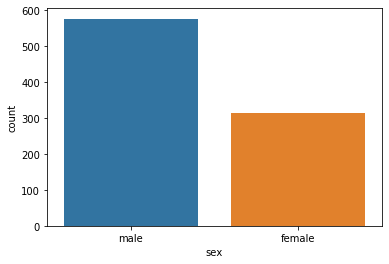

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


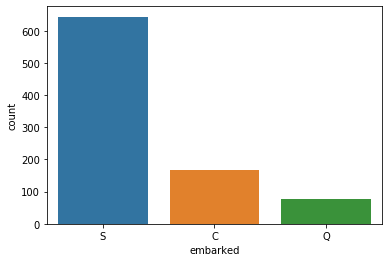

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


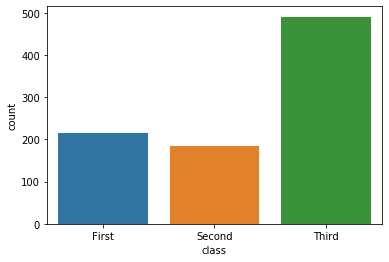

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


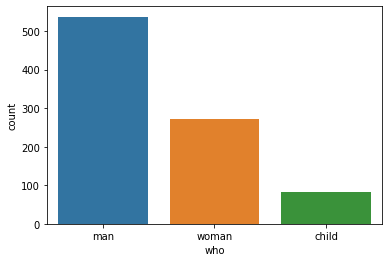

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


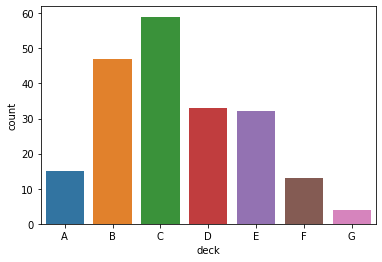

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


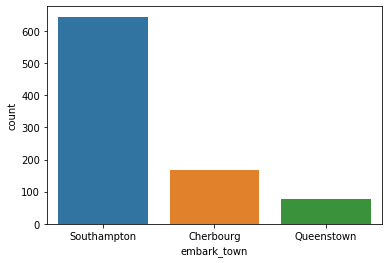

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


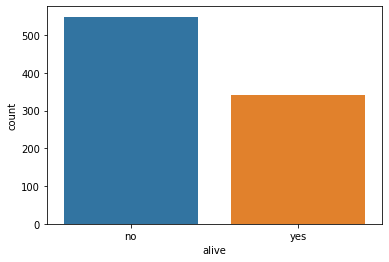

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################


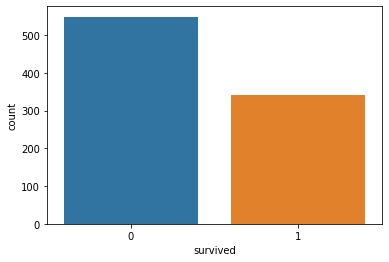

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################


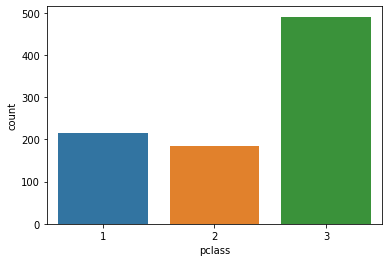

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################


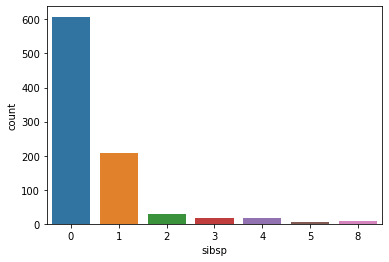

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################


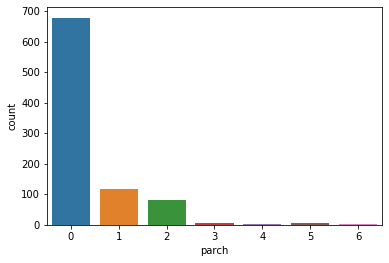

In [76]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
cat_summary(df, "sex", plot=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)
    

In [78]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [79]:
cat_summary(df, "survived")

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################


#### Hedef Değişkenin(Survived) Kategorik Değişkenler ile Analizi

In [81]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [84]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
target_summary_with_cat(df, "survived", "sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [85]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363


In [86]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
          TARGET_MEAN
survived             
0                 0.0
1                 1.0
        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363
       TARGET_MEAN
sibsp             
0         0.345395
1      

#### Hedef Değişkenin Sayısal Değişkenlerle Analizi

In [87]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [88]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [93]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690




In [94]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




### Analysis of Correlation

In [96]:
df = pd.read_csv("breast_cancer.csv")
df = df.iloc[:, 1:-1]
#1' den, -1'e kadar giderek istenmeyen baştaki ve sondaki değişken alınmaz
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
# Isı haritası ile corelasyona bakmak, yüksek corelasyondaki bazı değişkenler
# dışarıda bırakmaktır. Yüksek cor değişkenleri tespit edip analiz yapmak için.

In [98]:
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

In [99]:
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [102]:
corr = df[num_cols].corr()
corr
#değişkenlerin birbiriyle ilişkisini ifade eder, -1 ile +1 arasındadır.
#-1 ile +1' e yaklaştıkça ilişki kuvvetlenir, pozitif veya negatif olarak.
#iki değişken arasındaki ilişki negatif ise bir değişkenin değeri artarken diğeri azalır.
#0' a yakın olanlar corr olmadığını gösterir.
#1' e yakın olanlar dışarıda bırakabilir.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


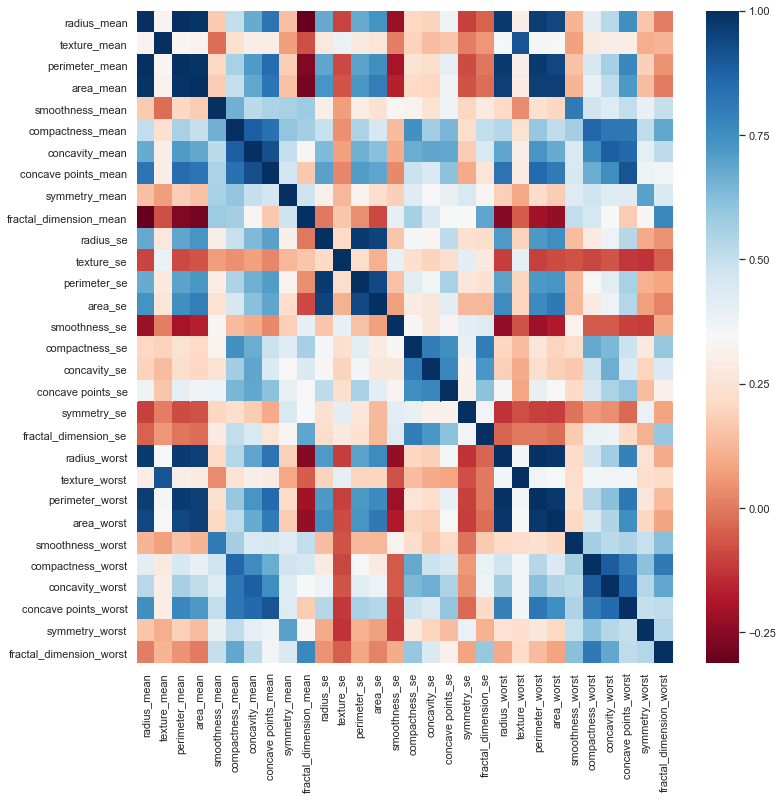

In [108]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

#### İhtiyaç olunduğunda yüksek korelasyonlu değişkenleri silme

In [116]:
cor_matrix = df.corr().abs()

In [125]:
#köşegenlerin altı ve üstü çaprazlama aynı bu yüzden kendini tekrarlıyor.
#bir tanesi silinmeli
import numpy as np

In [126]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
import warnings

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [127]:
upper_triangle_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [128]:
# değişkenlerdeki threshold = 0.9 dan büyükse sil

In [130]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
drop_list

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [134]:
cor_matrix[drop_list] #yüksek corr olanlar
df.drop(drop_list, axis=1) #yüksek corr olanlar silindi

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


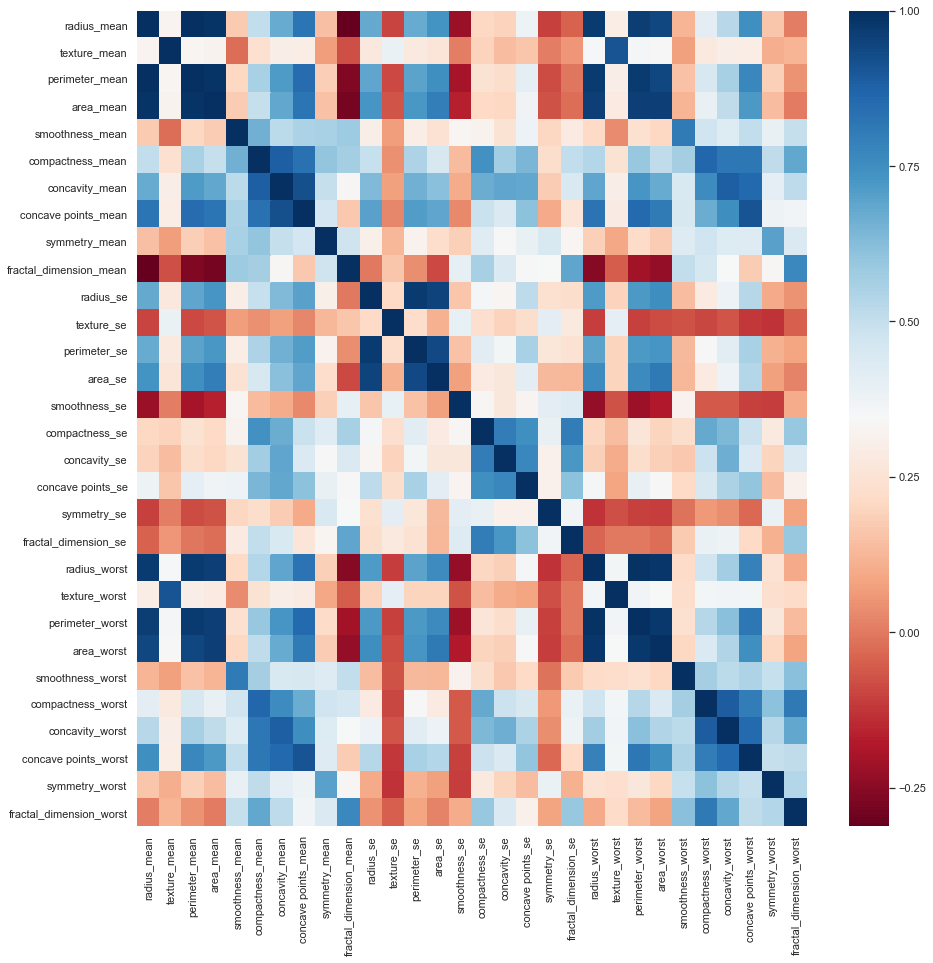

In [137]:
def high_correlated_cols(dataframe, plot=False, cor_th = 0.9):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > cor_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (15,15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list
high_correlated_cols(df)
drop_list = high_correlated_cols(df, plot=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


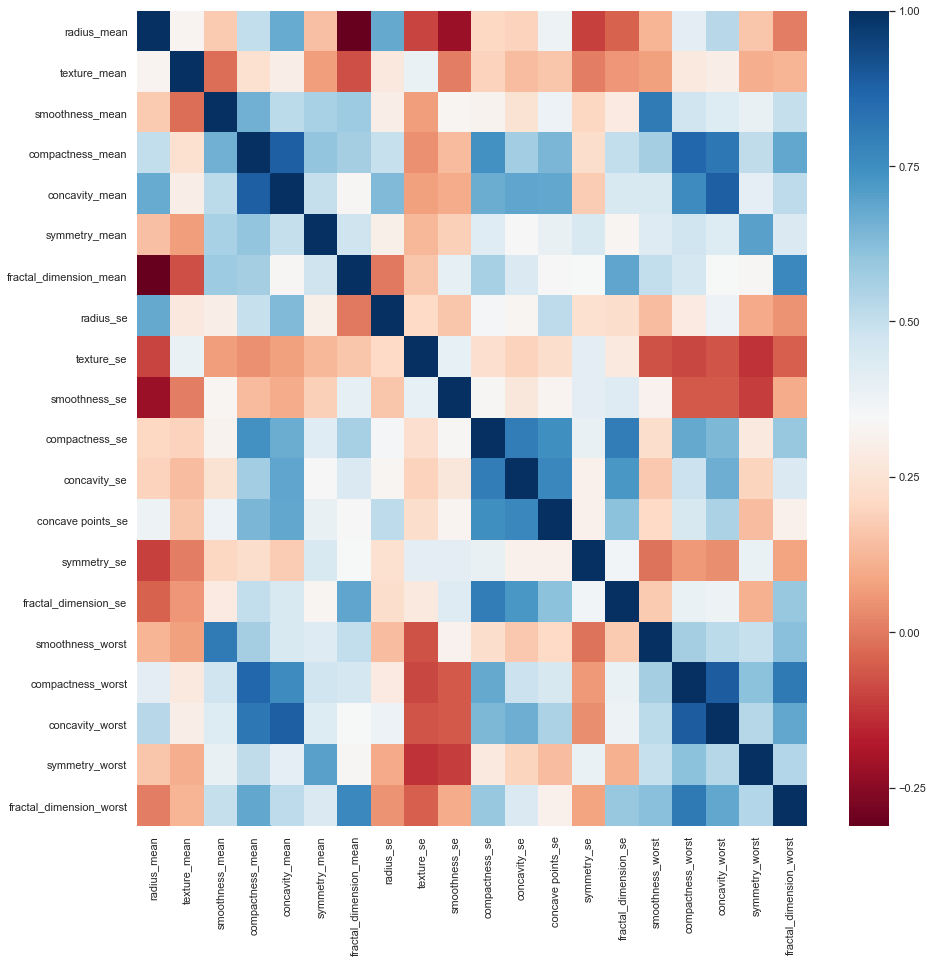

[]

In [139]:
df.drop(drop_list, axis=1)
high_correlated_cols(df.drop(drop_list, axis=1), plot=True)
#koyu kısım (yüksek corr), gitti.